### Load Clustered Data & Compute Cluster-wise Averages
Imported the refined dataset and calculated mean values of key financial features across clusters for comparison.


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('../data/refined_df.csv')
cluster_means = df.groupby('km_cluster')[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT']].mean().reset_index()
cluster_means.rename(columns={'km_cluster': 'Cluster'}, inplace=True)

In [33]:
df['km_cluster'].value_counts()

km_cluster
1    3892
2    3321
3    1229
0     508
Name: count, dtype: int64

### Prepare Data for Visualization
Melted the cluster-wise summary into long format for grouped bar plotting.


In [34]:
data_melted = cluster_means.melt(id_vars="Cluster", var_name="Metric", value_name="Value")

compare average values of Balance, Purchases, Cash Advance, and Credit Limit across clusters

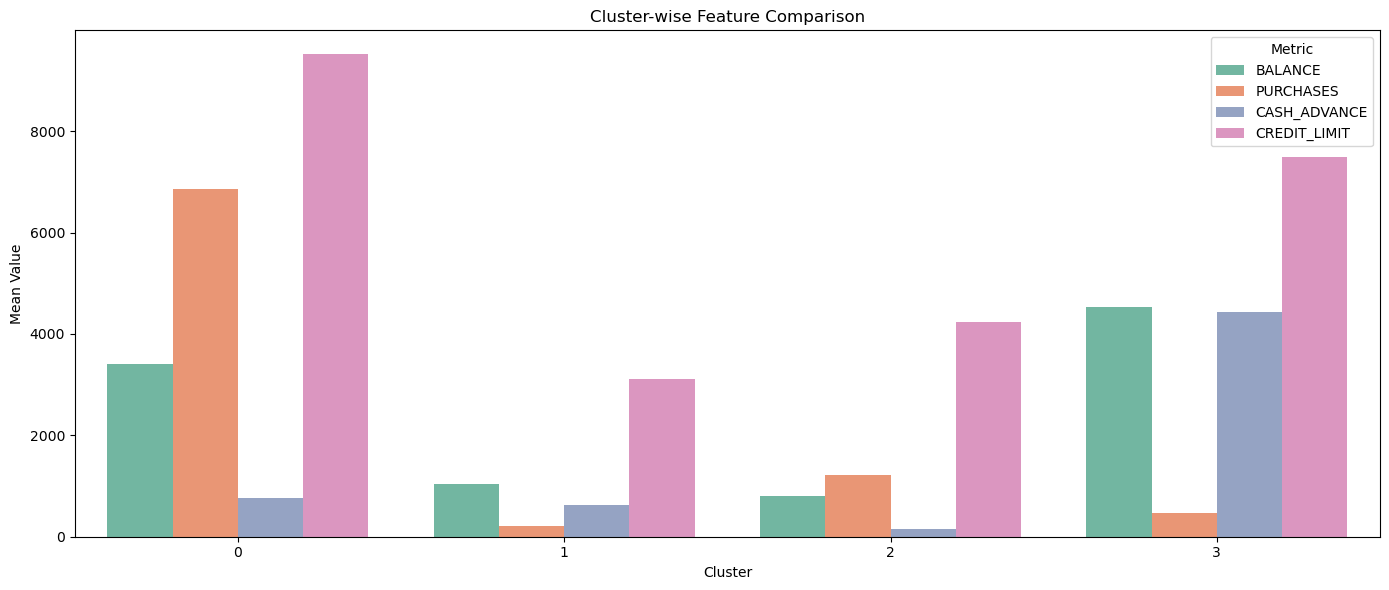

In [35]:
plt.figure(figsize=(14, 6))
sns.barplot(x="Cluster", y="Value", hue="Metric", data=data_melted, palette="Set2")
plt.title("Cluster-wise Feature Comparison")
plt.ylabel("Mean Value")
plt.tight_layout()
plt.show()

### Full Cluster-wise Feature Summary

In [37]:
df.groupby('km_cluster').mean()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PCA1,PCA2,Cluster_DBSCAN
km_cluster,,,,,,,,,,,,,,,,,,,,,
0,3102.490157,3407.363529,0.988541,6856.803071,4486.488465,2371.495709,769.743916,0.954891,0.726405,0.809186,...,2.346457,82.594488,9511.712598,6677.427679,1874.569573,0.285179,11.960630,5.972316,0.668923,0.029528
1,4764.371531,1030.013296,0.800627,219.845116,156.132107,64.044322,624.910401,0.185750,0.074092,0.106569,...,2.304728,2.894913,3120.143315,862.633826,560.421640,0.064001,11.365622,-1.372811,-0.175524,0.000000
2,4570.676905,812.715282,0.917893,1224.644384,615.419289,609.427892,146.555651,0.858635,0.299373,0.671453,...,0.567600,21.115929,4232.541479,1318.387179,569.693429,0.282703,11.655525,0.888282,-1.171359,0.000000
3,3863.757526,4526.663819,0.964222,466.026127,302.444841,163.681912,4435.316476,0.267768,0.130512,0.167605,...,13.856794,6.755085,7480.475627,3566.940229,2063.890413,0.034927,11.441009,-0.521515,3.444598,0.027665


## Business Insight

After performing K-Means clustering, we identified **4 unique customer segments** to enable focused business strategy and targeted offers.


### Cluster 0 – **Loyal Spenders**
- **Balance:** ₹3102 | **Credit Limit:** ₹9512
- High purchases and full payments
- Uses both one-off and installment purchases
- Ideal for loyalty and reward programs

### Cluster 1 – **Low-Engaged Users**
- **Balance:** ₹4764 | **Credit Limit:** ₹3120
- Very low purchase activity and frequency
- High balance with minimal engagement
- Ideal for reactivation campaigns

### Cluster 2 – **Installment Spenders**
- **Balance:** ₹4571 | **Credit Limit:** ₹4233
- Higher usage of installments over one-off
- Consistent purchasing habits
- EMI-focused product promotion recommended

### Cluster 3 – **Cash Advance Seekers**
- **Balance:** ₹3864 | **Credit Limit:** ₹7480
- Very high cash advance usage
- Low purchase frequency, low full payment ratio
- Needs credit risk assessment and cash alternative education

## Strategy Suggestions Based on Clusters

- **Cluster 0 – Loyal Spenders**: Promote cashback, loyalty points, and reward-based engagement.
- **Cluster 1 – Low-Engaged Users**: Offer low-risk engagement schemes, reactivation offers.
- **Cluster 2 – Installment Spenders**: Push EMI offers and flexible repayment plans.
- **Cluster 3 – Cash Advance Seekers**: Offer personal loan alternatives and financial literacy campaigns.


C:\Users\HP\AppData\Local\Temp\ipykernel_15448\1206883610.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='coolwarm')


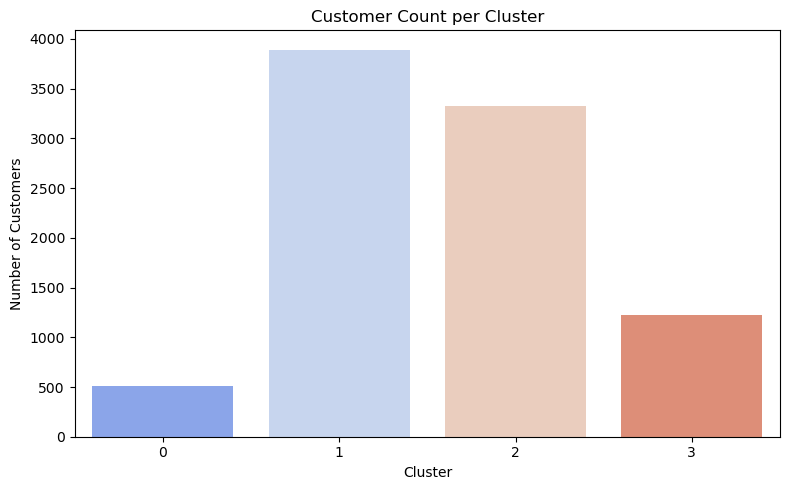

In [38]:
plt.figure(figsize=(8, 5))
cluster_counts = df['km_cluster'].value_counts().sort_index()
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='coolwarm')
plt.title("Customer Count per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()